In [1]:
"""Algorithme de Gibbs : régression linéaire

Objectif : tracer la densité de la solution au problème ERM-RER

"""

import numpy as np
import scipy as sp

l = 1  #lambda le paramètre qui pondère l'espérance du risque empirique et l'entropie relative de la solution par rapport à la mesure de Lebesgue


"""On commence par coder le risque empirique"""

def L(z,theta):
    n = len(z)
    res = 0
    for i in range(n):
        res += (theta[0]*z[i][0]+theta[1]-z[i][1])**2
    return res

""" Si Q est la mesure de Lebesgue, la solution admet une densité proportionnelle à exp(-L(z,theta)/l)"""



def solution(z,l,theta):
    return  np.exp(-L(z,theta)/l)





In [11]:
"""On input le dataset"""

z = [(1,3),(3,7),(2,5),(0,0.5)]

solution(z,l,(0,0))




6.998168281769004e-37

In [12]:
"""On on crée une matrice telle que le coefficient de coordonnées (i,j) soit la valeur de la densité de la solution pour theta = (i,j)"""

import matplotlib

m = 10 #pas

M = np.zeros((2*m+1,2*m+1))

for i in range(2*m+1):
    for j in range(2*m+1):
        M[i][j] = solution(z,l,(i-m,j-m))



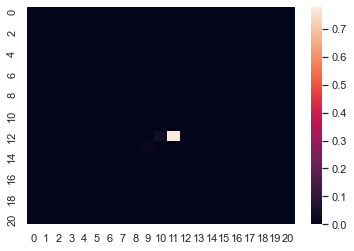

0.7788007830714049 (12, 11)


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
ax = sns.heatmap(M)
plt.show()

max = M[0][0]
coord = (0,0)
for i in range(2*m+1):
    for j in range(2*m+1):
        if M[i][j] > max:
            max = M[i][j]
            coord = (i,j)
print(max,coord)